# Using Puppeteer in a JS notebook powered by tslab

In [1]:
import * as tslab from "tslab";
import puppeteer from 'puppeteer';

## Initialize headless browser

In [2]:
const browser = await puppeteer.launch({
  headless: true,
  defaultViewport: {
    width: 1920,
    height: 1080,
    isLandscape: true,
  },
  ignoreHTTPSErrors: true,
  args: [
    '--no-sandbox',
    '--disable-setuid-sandbox',
    '--disable-infobars',
    '--window-position=0,0',
  ],
});
const [page] = await browser.pages();

## Taking screenshots

`page.screenshot()` returns a union type that includes void, and nobody likes void.
Even though, it's clearly not going to be void in this example, you have to coalesce it. Even without TypeScript...

In [3]:
async function screenshot(page) {
  var screenshot = await page.screenshot()
  screenshot ??= ""
  return tslab.display.png(Buffer.from(screenshot))
}

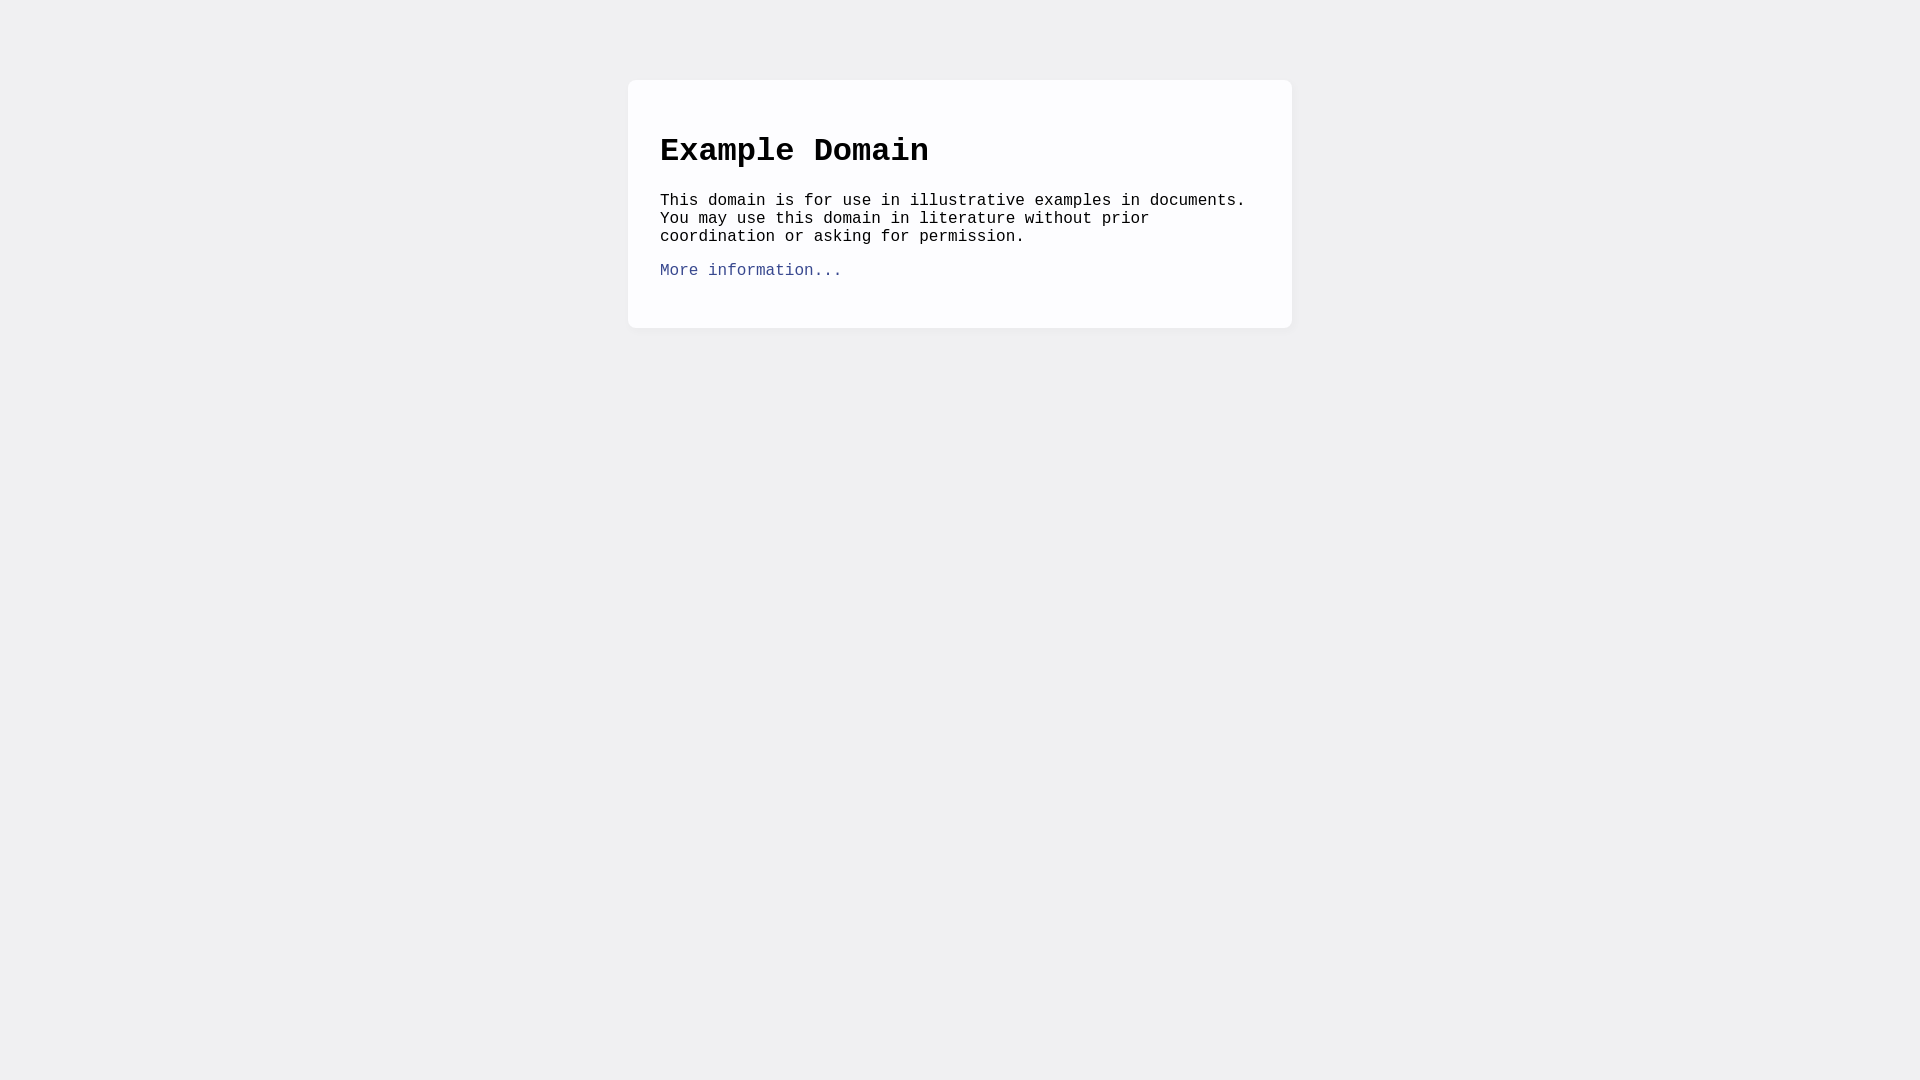

In [4]:
await page.goto('https://example.com/');
await screenshot(page)

## Scrape some stuff

In [5]:
const paragraphs = await page.$$(`p`);
paragraphs.length

2


In [6]:
await page.$$eval(`p`, ps => {
  return ps
    .map(p => p.innerText)
    .join(`\n`)
});

This domain is for use in illustrative examples in documents. You may use this domain in literature without prior coordination or asking for permission.
More information...
